## Importing necessary modules and libraries

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

## Reading the train and test datasets

In [4]:
# importing drive, comment out the next two lines if running on local device
from google.colab import drive
drive.mount('/content/drive')

In [5]:
DATA_PATH='./drive/My Drive/Assignment1/data/' # replace with Data Path before execution
train_file=pd.read_pickle(DATA_PATH + "train.pkl")
test_file=pd.read_pickle(DATA_PATH + "test.pkl")

## Visualising the given dataset

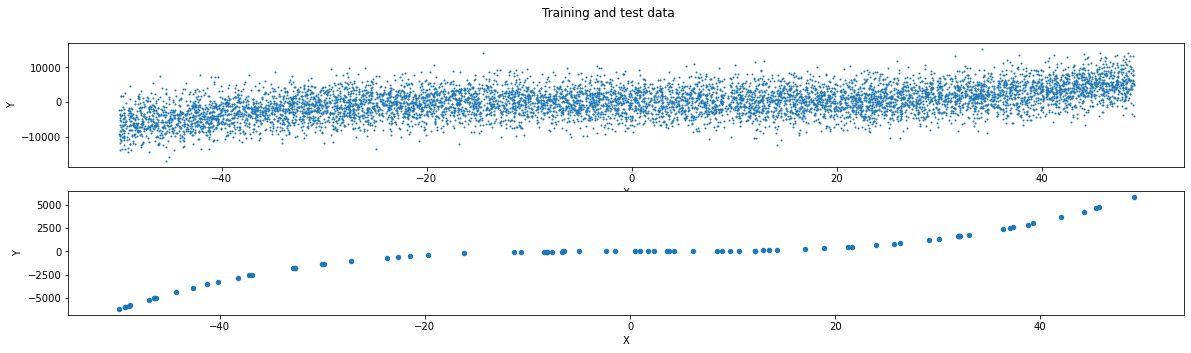

In [6]:
df_train = pd.DataFrame(train_file, columns=["X", "Y"])
df_test = pd.DataFrame(test_file, columns=["X", "Y"])
plt.rcParams["figure.figsize"] = (20, 5)
fig, axs = plt.subplots(2)
fig.suptitle('Training and test data')
df_train.plot.scatter(x = "X", y='Y', s=1, ax=axs[0])
df_test.plot.scatter(x = "X", y='Y', ax=axs[1])
plt.show()

## Visualising the training sets after splitting

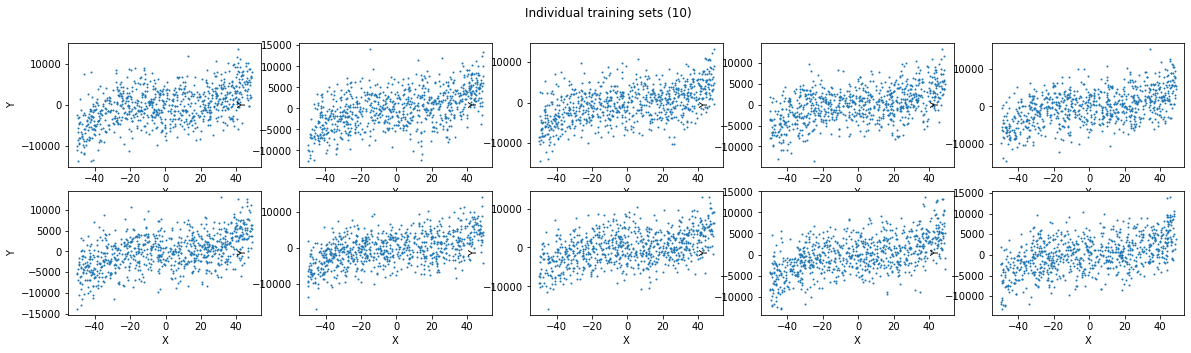

In [7]:
shuffled_train = df_train.sample(frac=1)
final_train = np.array_split(shuffled_train,10)
plt.rcParams["figure.figsize"] = (20, 5)
fig, axs = plt.subplots(2, 5)
fig.suptitle('Individual training sets (10)')
for i in range(10):
  final_train[i].plot.scatter(x = "X", y='Y', s=1, ax=axs[int(i/5)][i%5])
plt.show()

## Making models for the polynomial regression

In [8]:
def polyModel (deg, X, Y):
  poly = make_pipeline(PolynomialFeatures(degree=deg, include_bias=False, interaction_only=False), LinearRegression())

  X = np.array(X).reshape(-1, 1)
  Y = np.array(Y).reshape(-1, 1)

  poly.fit(X, Y)
  return poly

## Calculating Bias and Variance and tabulating them:

In [9]:
test_X = np.array(df_test['X']).reshape(-1,1)
test_Y = np.array(df_test['Y']).reshape(-1,1)

final_list = []
final_bias_var=[]
final_sec=[]

for i in range(20):
  deg = i+1


  exp_val = np.zeros([80,1])

  for j in range(10):
    model = polyModel(deg, final_train[j]['X'], final_train[j]['Y'])
    exp_val += model.predict(test_X)
  
  exp_val/=10
  current_bias=exp_val-test_Y


  var_val = np.zeros([80,1])

  for j in range(10):
    model = polyModel(deg, final_train[j]['X'], final_train[j]['Y'])
    var_val+= (model.predict(test_X) -exp_val) ** 2

  var_val/=10


  temp_bias_square = (current_bias.flatten())**2
  temp_var = var_val.flatten()

  data = {"Bias Squares":temp_bias_square, "Variance": temp_var}
  final=pd.DataFrame(data)
  final_list.append(final)
  
  average_bias_square = np.mean(temp_bias_square)
  average_var = np.mean(temp_var)
  temp_element=[deg, average_bias_square, average_var]
  final_bias_var.append(temp_element)

  average_bias = np.mean(current_bias.flatten())
  temp_element=[deg, average_bias, average_var]
  final_sec.append(temp_element)
  

df_final_sec=pd.DataFrame(final_sec, columns=['Degree', 'Bias', 'Variance'])
df_final_sec

,Degree,Bias,Variance
0,1,232.757736,27026.604324
1,2,227.195424,33469.785162
2,3,-15.082857,45600.745299
3,4,-11.021634,66315.769324
4,5,-7.934442,89051.172868
5,6,-11.404342,121658.294586
6,7,-10.493080,142123.453967
7,8,-18.038539,216826.071351
8,9,-22.020796,243956.830148
9,10,-20.373468,207063.322724


## Tabulating Bias Square and Variance

In [10]:
df_final_bias_var=pd.DataFrame(final_bias_var, columns=['Degree', 'Bias Square', 'Variance'])
df_final_bias_var

,Degree,Bias Square,Variance
0,1,1.003602e+06,27026.604324
1,2,9.544558e+05,33469.785162
2,3,9.792856e+03,45600.745299
3,4,8.981337e+03,66315.769324
4,5,7.898864e+03,89051.172868
5,6,8.371970e+03,121658.294586
6,7,9.885432e+03,142123.453967
7,8,1.152931e+04,216826.071351
8,9,1.361385e+04,243956.830148
9,10,1.528007e+04,207063.322724


## Calculating the Mean Square Error (MSE):

In [11]:
list_mse=[]

for i in range(20):
  deg = i + 1

  temp_list = np.zeros([80,1])

  for j in range(10):
    model = polyModel(deg, final_train[j]['X'], final_train[j]['Y'])
    temp_mse=(model.predict(test_X) - test_Y) ** 2
    temp_list+=temp_mse

  temp_list/=10
  deg_mse=np.mean(temp_list.flatten())

  temp_element=[deg, deg_mse]
  list_mse.append(temp_element)
  
df_list_mse=pd.DataFrame(list_mse, columns=['Degree', 'MSE'])
df_list_mse

,Degree,MSE
0,1,1.030628e+06
1,2,9.879255e+05
2,3,5.539360e+04
3,4,7.529711e+04
4,5,9.695004e+04
5,6,1.300303e+05
6,7,1.520089e+05
7,8,2.283554e+05
8,9,2.575707e+05
9,10,2.223434e+05



## Calulating Irreducible Error and tabulating the same:


In [12]:
ire_list = df_list_mse['MSE']-(df_final_bias_var['Variance'] + df_final_bias_var['Bias Square'])

degrees=list(range(1,21))

df_ire= pd.DataFrame(degrees, columns=['Degree'])
df_ire['Irreducible Error']=ire_list

df_ire

,Degree,Irreducible Error
0,1,-1.164153e-10
1,2,-1.164153e-10
2,3,-7.275958e-12
3,4,-1.455192e-11
4,5,-2.910383e-11
5,6,1.455192e-11
6,7,-5.820766e-11
7,8,5.820766e-11
8,9,2.910383e-11
9,10,-2.910383e-11


## Plotting the Bias Square and Variance, versus the Degree

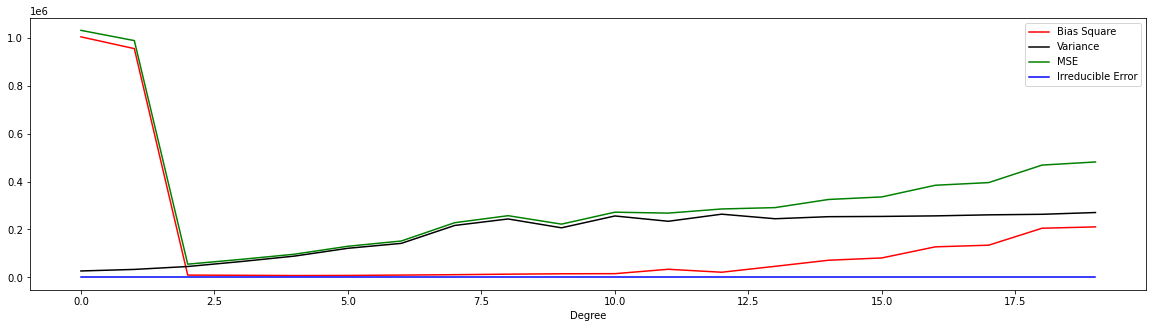

In [13]:
#plt.rcParams["figure.figsize"] = (20, 5)
#ax1 = df_final_bias_var.plot(x = "Degree", y='Bias Square', color="red", kind='line')
#ax2 = df_final_bias_var.plot(x = "Degree", y='Variance', color="black", kind='line', ax=ax1)
#ax3 = df_list_mse.plot(x = "Degree", y='MSE', color="green", kind='line', ax=ax1)
#ax4 = df_ire.plot(x = "Degree", y='Irreducible Error', color="blue", kind='line', ax=ax1)
#plt.show()

fig, ax = plt.subplots() # Create a figure and an axis
ax.plot(df_final_bias_var['Bias Square'], label='Bias Square', color='red')
ax.plot(df_final_bias_var['Variance'], label='Variance', color='black')
ax.plot(df_list_mse['MSE'], label='MSE', color='green')
ax.plot(df_ire['Irreducible Error'], label='Irreducible Error', color='blue')
ax.set_xlabel('Degree')
#ax.set_title('Probability distibution graph for the guy to be at origin after n timesteps')
ax.legend()  # Add a legend
fig.savefig("Graph1.png")